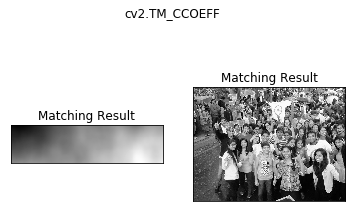

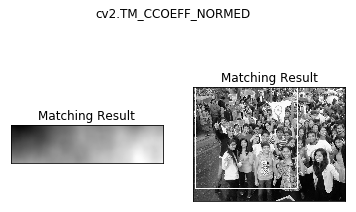

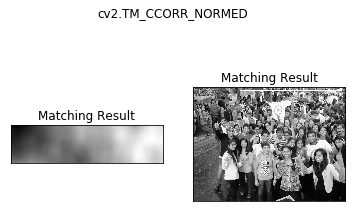

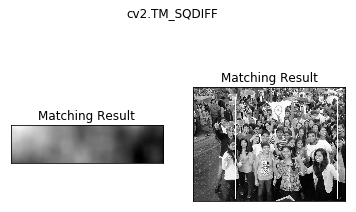

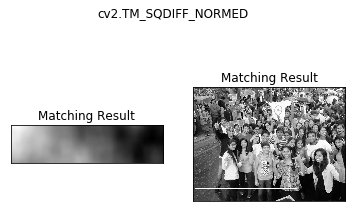

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread(r'C:\Users\80LM0141IH\Desktop\Mini_PhotoshopV2\images\people.jpg',0)
img2=img.copy() # now altering img is safe

template=cv2.imread('C:\Users\80LM0141IH\Desktop\Mini_PhotoshopV2\images\lotOfPeople.jpg',0)
w,h=template.shape[::-1] # reverses the template.shape array.

# all the methods are:
methods=['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img=img2.copy()
    method=eval(meth)
#     print method
    res = cv2.matchTemplate(img,template,method)
    minVal,maxVal,minLoc,maxLoc=cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF,cv2.TM_CCOEFF_NORMED]:
        topLeft=minLoc
    else :
        topLeft=maxLoc
    bottomRight=(topLeft[0]+w,topLeft[1]+h)
    
    cv2.rectangle(img,topLeft,bottomRight,255,2)
    
    plt.subplot(121),plt.imshow(res,cmap='gray')
    plt.title('Matching Result'),plt.xticks([]),plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap='gray')
    plt.title('Matching Result'),plt.xticks([]),plt.yticks([])
    plt.suptitle(meth)
    plt.show()

